In [1]:
# Handwritten digit classification using one input, 784 layers(28 X 28) and 
# 10 output layers for digits 0-9 for (28 X 28) pixel image

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [4]:
# zero hidden layers
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

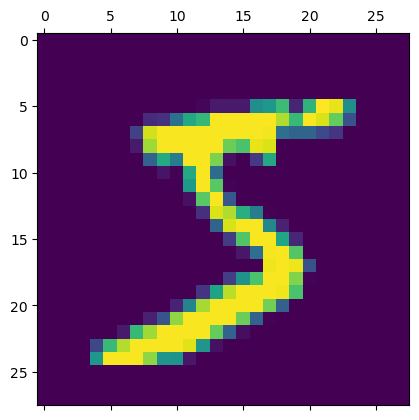

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
X_train = X_train/255 #scaling to improve model's performance

In [12]:
X_test = X_test/255

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [14]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
model.fit(X_train_flattened, y_train, epochs=5)
model.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4747 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3049 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9227
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.9262


[0.27092811465263367, 0.9261999726295471]

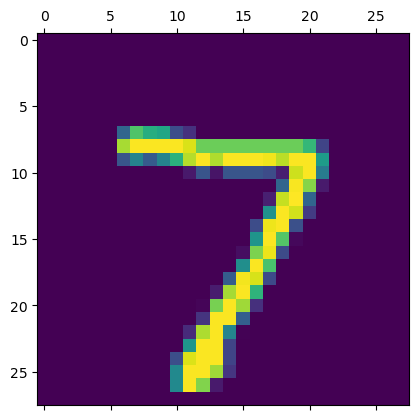

In [19]:
plt.matshow(X_test[0])

In [20]:
# test for 0th index test data
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])


313/313 [==============================] - 2s 3ms/step


7

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
# y_predicted_labels[:5] ~ y_test[:5]

In [23]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    4,    8,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   5,    9,  930,   13,    9,    4,   12,   11,   36,    3],
       [   5,    0,   20,  907,    0,   33,    4,   13,   22,    6],
       [   1,    1,    6,    0,  928,    0,   11,    4,   10,   21],
       [  10,    3,    4,   21,   11,  785,   19,    7,   28,    4],
       [   8,    3,    6,    1,    7,    9,  921,    2,    1,    0],
       [   1,    6,   24,    2,    8,    0,    0,  968,    2,   17],
       [   8,    9,    9,   21,    9,   24,   11,   15,  863,    5],
       [  11,    7,    1,   10,   45,    8,    0,   42,    4,  881]])>

Text(95.72222222222221, 0.5, 'Truth')

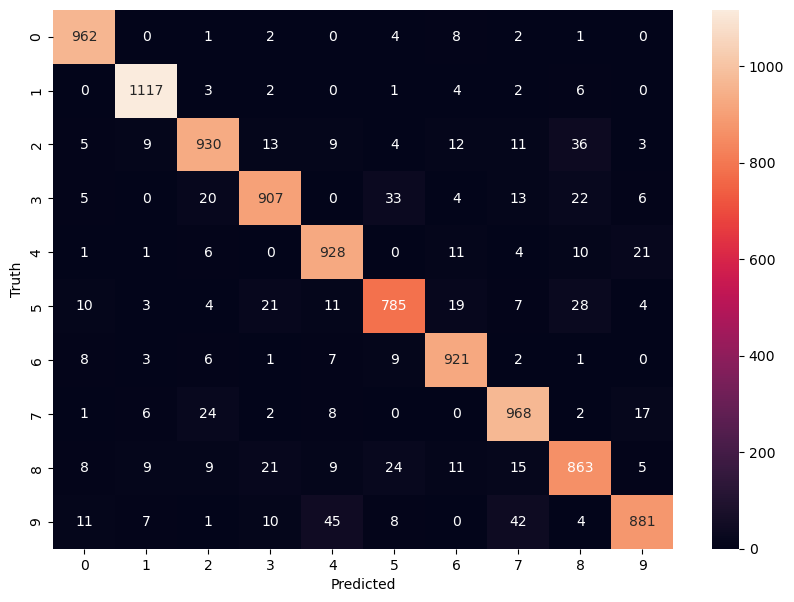

In [26]:
plt.figure(figsize = (10,7)) 
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
#with one hidden layers to improve efficieny

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2804 - accuracy: 0.9195
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1289 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0900 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0539 - accuracy: 0.9834


In [31]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9752


[0.08200785517692566, 0.9751999974250793]